# Probability & Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Probability Theory

Probability Theory provides a mathematical framework for computing the probability of complex events, given that we have a notion for the probability of the basic parts.

#### Simulating Coin Flips

Let's consider heads = 1 and tails = -1. As we increase the number of coin tosses (k), the sum of the results should tend to converge around 0. Then we can repeat the number of times that we run the experiment (n) and create a histogram of the results of each trial.

In [2]:
def flip_coin(k, n):
    tosses = np.random.choice([-1, 1], (k, n))
    total = np.sum(tosses, axis=0)
    return tosses, total

In [3]:
# Another way of simulating coin tosses
def generate_coin_toss(k, n):
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

In [4]:
# Flip 10 coins, repeat 3 times
tosses, total = flip_coin(10, 3)
print(tosses)

[[-1  1 -1]
 [-1 -1  1]
 [ 1 -1 -1]
 [-1 -1  1]
 [-1  1  1]
 [ 1  1 -1]
 [ 1 -1 -1]
 [ 1  1 -1]
 [ 1  1 -1]
 [ 1 -1 -1]]


In [5]:
# Then we can sum the results for each experiment
total

array([ 2,  0, -4])

In [6]:
# Next, simulate 100 coin tosses, 1000 times
k = 100
sim_tosses, sim_total = flip_coin(k, 1000)

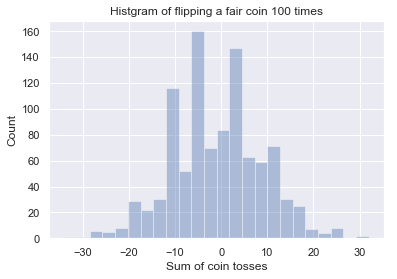

In [7]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

In [8]:
# Next, simulate 1000 coin tosses, 1000 times
k = 1000
sim_tosses, sim_total = flip_coin(1000, 1000)

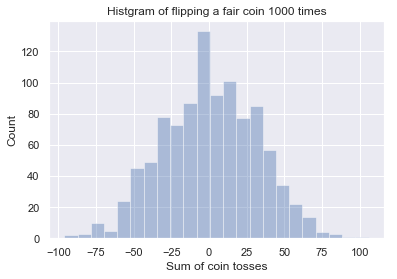

In [9]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

Using probability theory, we can determine the bounds of the sum of these coin tosses, namely, that the probability of $|S_k| \ge 4\sqrt{k}$ is smaller than $2x10^{-8}$.

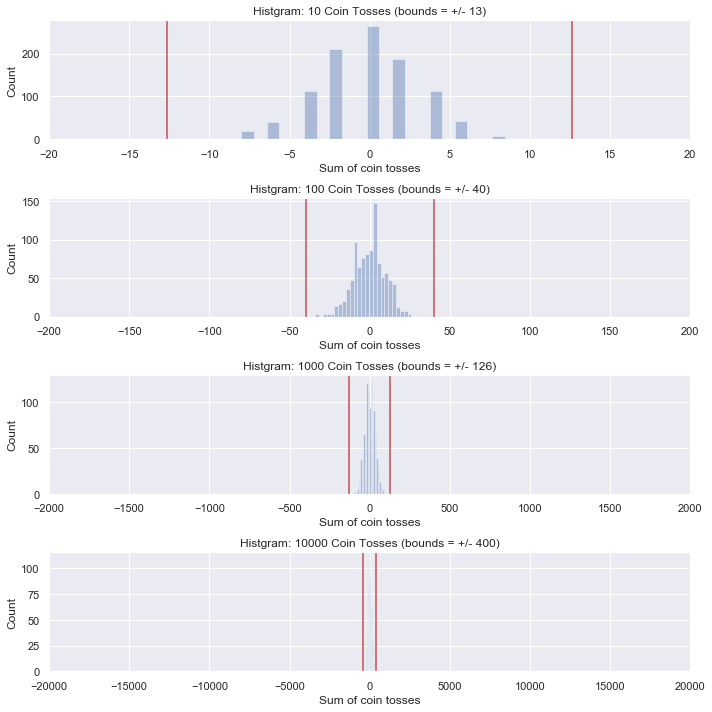

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

for i in range(1,5):
    k = 10**i
    sim_tosses, sim_total = flip_coin(k, 1000)
    bounds = 4 * np.sqrt(k)
    sns.distplot(sim_total, kde=False, ax=ax[i-1])
    ax[i-1].set_xlim([-k-1*k, k+1*k])
    ax[i-1].axvline(x=bounds, c='r')
    ax[i-1].axvline(x=-1*bounds, c='r')
    ax[i-1].set_title("Histgram: {} Coin Tosses (bounds = +/- {:.0f})".format(k, bounds))
    ax[i-1].set_xlabel("Sum of coin tosses")
    ax[i-1].set_ylabel("Count")
plt.tight_layout()

#### Summary

Coin toss experiments were simulated using ```numpy```, with heads and tails assigned values, $x_h = 1$ and $x_t = -1$, each occuring with an equal probability of $1/2$. The sum of $k$ coin tosses, $S_k = x_1 + x_2 + ... + x_k$, converges around zero and is almost always within the range $[-4\sqrt{k}, +4\sqrt{k}]$.


## Statistics

Statistics allows us to infer the properties of underlying events given data that was generated by a stochastic process. For example, we can use statistics to decide whether a coin is biased given that we have gotten 570 heads out of 1000 total coin flips. The thinking goes like this:

* Assume we have an unbiased coin
* Using probability theory, determine the probability of getting 570 heads (430 tails)
* If the probability is very small, within a threshold, we can reject with confidence the hypothesis that the coin is fair

This means we draw conclusion about systems and signals by analyzing real-world data.

#### The 3 Card Problem

A card is drawn from a hat containing three cards:

* One with Red on both sides
* One with Blue on both sides
* One with Red on one side and Blue on the other

If the other side of the card has a different color, you win. Otherwise, I win.

This is a great example where intuition may lead you to believe that you have a 50:50 chance of winning. Why? If the face up card is red, then the other side is either red or blue. But wait....

When we run a monte carlo simulation, we observe something unexpected.

In [27]:
cards = ['bb', 'rr', 'br']
winners = []
n = 100

for i in range(n):
    card = np.random.randint(0, 3)
    # You win
    if cards[card] == 'br':
        winners.append(0)
    # I win
    else:
        winners.append(1)

my_score = np.sum(winners)
your_score = n - my_score
print("I win {} | You win {}".format(my_score, your_score))

I win 65 | You win 35


In fact, the two sides have the same color twice as often as they have different colors. As we see, you are twice as likely to lose as you are to win. 

#### Estimating the Probability of Heads

Estimate the probability that n flips of a fair coin result in between k1 to k2 heads (repeated for m trials).

In [126]:
def num_heads(m, n):
    flips = np.random.randint(0, 2, size=(m, n))
    return np.sum(flips, axis=1)

In [127]:
def estimate_probability(n, k1, k2, m):
    num = num_heads(m, n)
    result = num[(num >= k1) & (num < k2)]
    return len(result) / m

In [128]:
estimate_probability(100,45,55,1000)

0.686

## Sets

Sets are a collection of elements. They may be explicitly defined with specific items or more broadly defined using a category.

If an element x is in set A, we call it a member. This is denoted $x \in A$. An element not in A is denoted $y \not\in A$. You can also say the opposite, namely, that A contains x, $A \supseteq x$.

When dealing with sets, order and repetition do not matter.

**Special Sets**

* Empty set: $\varnothing$ - for all x, x is not a member of empty set ($\forall x, x\not\in\varnothing$)
* Universal set: $\Omega$ - for all x, x is a member of universal set ($\forall x, x\in\Omega$)

#### Defining a Set & Basic Properties

In [1]:
set1 = {1, 2}
set2 = set({1, 2})

set1, set2

({1, 2}, {1, 2})

In [3]:
empty = set()

empty

set()

In [7]:
not empty

True

In [4]:
languages = set({"javascript", "python", "c"})

In [8]:
not languages

False

In [5]:
"python" in languages

True

In [6]:
"spanish" in languages

False

In [9]:
len(languages)

3